In [244]:
!pip install numpy
!pip install matplot
!pip install 

ERROR: You must give at least one requirement to install (see "pip help install")


In [245]:
import numpy as np
import matplotlib.pyplot as plt

In [246]:
# defining white noise
i = np.random.normal(0,1,20000)

In [247]:
def delta(n,pos):
    if n==pos:
        return 1
    else:
        return 0

In [248]:
def whitenoise(mu, sigma, points):
    return np.random.normal(0,1,20000)

In [249]:
def l_value(n):
    return 0.6*delta(n,0)+0.4*delta(n,1)

In [250]:
def s_value(i,n):
    if n-1 <0:
        return 0.6*i[n]
    else:
        return 0.6*i[n]+0.4*i[n-1]

In [251]:
def s_seq(i,length):
    s = []
    for idx in range(1,length):
        s.append(s_value(i,idx))
    return s

In [252]:
def autocorrelation(start,end):
    R=[]
    for m in range(start,end):
        sum_R_value = 0
        for k in range(start,end):
            R_value = l_value(k)*l_value(m+k)
            sum_R_value = sum_R_value + R_value
        R.append(sum_R_value)
    return R

In [253]:
def compute_ak(R):
    R_seq = []
    R_known = []
    for idx,val in enumerate(R):
        R_seq_row=[]
        for k in range(1,11):
            if k == 10:
                R_value = 0
            elif idx-k < 0:
                R_value = R[np.abs(idx-k)]
            else:
                R_value = R[idx-k]
            R_seq_row.append(R_value)
        R_seq.append(R_seq_row)
        R_known.append(val)
    return R_known, R_seq

In [254]:
def Levinson_alg(R):
    R.append(0)
    A = []
    p = []
    k = []
    # precalculate a1
    a = []
    A.append(["a_00"])
    a1 = R[1]/R[0]
    k1 = R[1]/R[0]
    p1 = (1-k1**2)*R[0]
    a.append("a_10")
    a.append(a1)
    A.append(a)
    p.append(p1)
    k.append(k1)
    for n in range(2,11):
        sum_axR = 0
        a = []
        for k in range(1,n):
            sum_axR = sum_axR + A[n-1][k]*R[n-k]
        k_n = (R[n]-sum_axR)/p[-1]
        p.append(p[-1]*(1-k_n**2))
        a_n_n = k_n
        for k in range(0,n):
            if k == 0:
                a.append("a_{}_0".format(n))
            else:
                a.append(A[n-1][k]-k_n*A[n-1][n-k])
        a.append(a_n_n)
        A.append(a)
    return A[-1]

In [255]:
def prediction(s,a,start,end):
    s_hat = []
    for n in range(start,end):
        sum_axs = 0
        for k in range(1,11):
            sum_axs = sum_axs+a[k]*s[n-k]
        s_hat.append(sum_axs)
    return s_hat

In [256]:
def print_matric(matrix):
    for row in matrix:
        string = ""
        for col in row:
            string = string+"\t"+str(col)
        print(string)

In [257]:
def get_error(s,s_hat):
    error = []
    count = 1
    error_sum = 0
    for (a,b) in zip(s,s_hat):
        error_sum = error_sum + (a-b)**2
        error.append(error_sum/count)
        count = count+1
        print(np.abs(a-b))
    return error

In [258]:
def getT(p,delt):
    n=[]
    for d in delt:
        for idx in range(1,101):
            if p[idx-1]>= np.abs(p[idx]-p[idx-1])/d:
                n.append(idx)
                break
    return n

## Main Function

In [259]:
mu = 0
sigma = 1
points = 10000
i = whitenoise(mu,sigma,points)
R = autocorrelation(0,10)
#R_known,R_seq = compute_ak(R)
a_10_k = Levinson_alg(R)
s = s_seq(i,15000)
print(a_10_k)
s_hat = prediction(s,a_10_k,10000,10101)
error = get_error(s[10000:10101],s_hat)
print(error)

['a_10_0', 0.6665552707926888, -0.44420308671749253, 0.295884750428545, -0.19688053921102167, 0.13068975119533527, -0.08628058837887148, 0.056251523625552906, -0.03559771280982651, 0.02087685412907118, -0.009635471136494392]
0.8739964899452868
0.5862210371019756
0.5582598842844531
0.061228092496795894
0.0011473569896026034
0.651242762719088
0.019904519372210328
0.4091036901292742
0.35528992921074737
0.9787396249179786
0.1897525283793715
0.20952241614431422
0.8931020828742067
0.4823378550483973
0.0029412090449744133
0.6308275262543889
0.9666568664092843
0.5140428071465727
0.22760394908161513
0.2829494666964166
1.0623127116598197
0.8995363289830423
0.4466192817746699
0.5604326887826324
0.0636979880861282
0.7484845341046149
0.406352292832256
0.34892229338218206
0.4862091833945634
1.1115760169583035
1.7913064858644858
0.1950124103182641
0.7769585629058697
0.09617183535943052
0.16849916095246095
0.36933550116828173
0.04132316293316454
0.5192779795594826
0.514888398517295
0.4284893779097657


In [260]:
result = getT(error,[0.1,0.05,0.03,0.02,0.01])
print(result)

[5, 7, 13, 13, 23]


## Ploting

<function matplotlib.pyplot.show(close=None, block=None)>

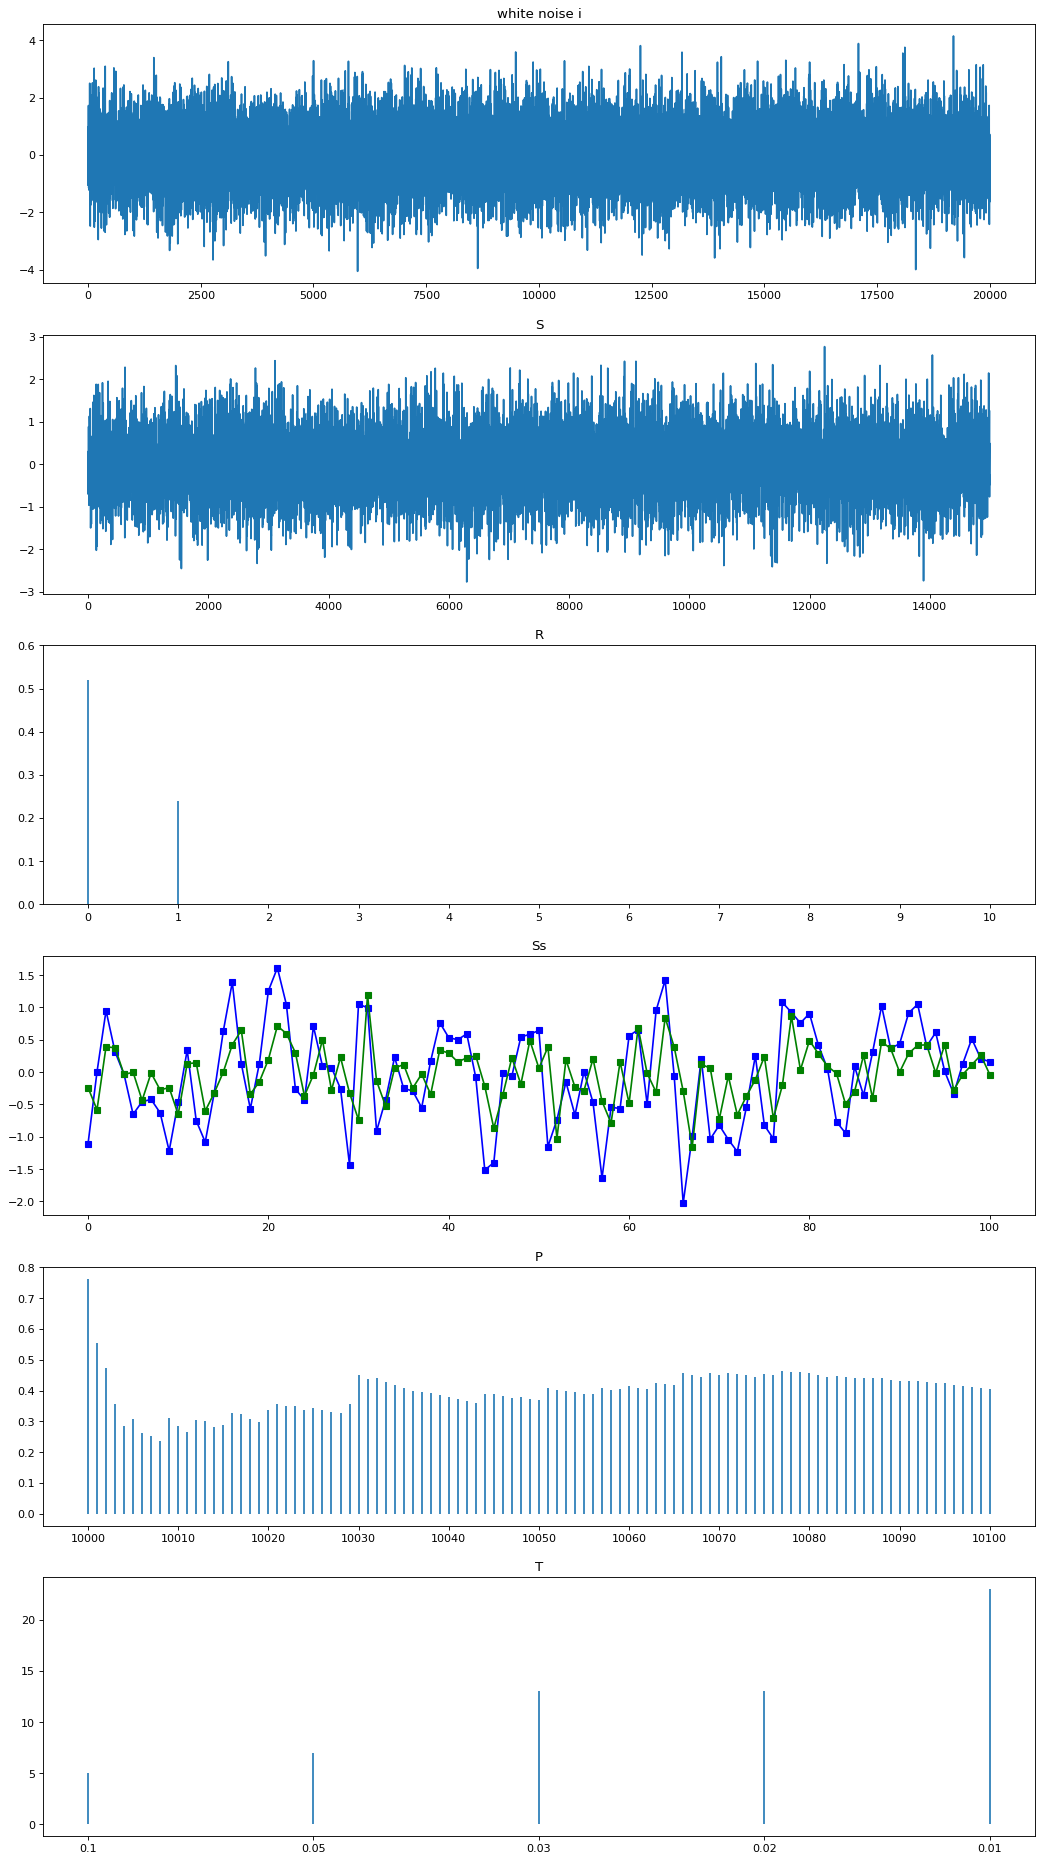

In [261]:
fig = plt.figure(num=None, figsize=(16,30),dpi=80)
axes = []
# white noise i
axes.append(fig.add_subplot(6,1,1))
axes[-1].set_title("white noise i")
plt.plot(i)
# S
axes.append(fig.add_subplot(6,1,2))
axes[-1].set_title("S")
plt.plot(s)
# R
axes.append(fig.add_subplot(6,1,3))
axes[-1].set_title("R")
plt.ylim([0, 0.6])
plt.xticks(range(0,11))
for idx,value in enumerate(R):
    plt.vlines(idx, ymin=0, ymax=value)
# predicted s and s
ax = fig.add_subplot(6,1,4)
axes.append(ax)
axes[-1].set_title("Ss")
ax.plot(s[10000:10101],c='b', marker="s", label='S')
ax.plot(s_hat,c='g', marker="s", label='s_hat')
# error
axes.append(fig.add_subplot(6,1,5))
axes[-1].set_title("P")
plt.xticks(range(0,101,10),range(10000,10101,10))
for idx,value in enumerate(error):
    plt.vlines(idx, ymin=0, ymax=value)
# T
axes.append(fig.add_subplot(6,1,6))
axes[-1].set_title("T")
plt.xticks(np.arange(5),[0.1,0.05,0.03,0.02,0.01])
for idx,value in enumerate(result):
    plt.vlines(idx, ymin=0, ymax=value)
plt.show